# Finding The Best Markets to Advertise In

Mock project from DataQuest: treating this project as an assignment from a mock employer, my task is to find which markets would be best to advertise my employer's new e-learning resource. This will be done by finding out which countries my target audience live in.

Link: https://www.dataquest.io/m/310-guided-project-finding-the-best-markets-to-advertise-in/

---
### Information on dataset 


This dataset comes from **freeCodeCamp's 2017 New Coder Survey**. The survey asks various questions from coders with varying interests. freeCodeCamp offers free e-learning resources, especially for we dev. I will be using this data to perform preliminary analysis without conducting a survey myself. This saves time since this dataset offers insight into the virtual spaces new coders spend time learning to code.

---

In [2]:
import pandas as pd
import numpy as np

#for string search using regular expressions
import re

In [297]:
data = pd.read_csv('./2017-fCC-New-Coders-Survey-Data.csv')

C:\Users\Yousef\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [298]:
data.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
data.shape

(18175, 136)

In [15]:
data.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

---
### Is this dataset relevant to my analysis?

I will first make sure that this dataset contains a sample of coders that are representative of the target population for my employer's e-learning platform. To do this, I will first see if the interests of the sample are in line with the topics covered on our platform. 

The **JobRoleInterest** column should offer some insight.

----

In [194]:
sample_interest = data['JobRoleInterest']

In [195]:
sample_interest.head(5)

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [196]:
sample_interest.value_counts(normalize = True).to_frame()

,JobRoleInterest
Full-Stack Web Developer,0.117706
Front-End Web Developer,0.064359
Data Scientist,0.021739
Back-End Web Developer,0.020309
Mobile Developer,0.016733
...,...
"Full-Stack Web Developer, Back-End Web Developer, Front-End Web Developer, Game Developer, Mobile Developer",0.000143
"Information Security, Data Engineer, Quality Assurance Engineer, Data Scientist",0.000143
"Data Scientist, Data Engineer, Full-Stack Web Developer, Back-End Web Developer, Information Security",0.000143
"User Experience Designer, Front-End Web Developer, Mobile Developer, Product Manager",0.000143


----
### Filtering the data 

My employer's site contains courses specifically for web and mobile development. I will filter the original dataframe to include only new coders with an interest in these specific topics

----

In [197]:
#convert series to dataframe
sample_interest_df = pd.DataFrame(sample_interest)

#search sample interests for mobile and web related career interests
sample_interest_df['mobile'] = sample_interest.astype(str).apply(lambda x: re.search("Mobile", x) != None)
sample_interest_df['web'] = sample_interest.astype(str).apply(lambda x: re.search("Web", x) != None)

In [203]:
sample_interest_df.shape

(18175, 3)

In [199]:
sample_interest_df.head(5)

,JobRoleInterest,mobile,web
0,NaN,False,False
1,Full-Stack Web Developer,False,True
2,"Front-End Web Developer, Back-End Web Develo...",True,True
3,"Front-End Web Developer, Full-Stack Web Deve...",False,True
4,"Full-Stack Web Developer, Information Security...",True,True


In [209]:
sample_interest_df.sum(axis = 0)

mobile    2304
web       5780
dtype: int64

In [244]:
#Get indices of people with interest in web or mobile
sample_to_analyze_mob = sample_interest_df[sample_interest_df['mobile'] == True].index.tolist()
sample_to_analyze_web = sample_interest_df[sample_interest_df['web'] == True].index.tolist()
indicies_of_interest = sample_to_analyze_mob + sample_to_analyze_web

#make sure this matches with known number of web and mobile 
assert(len(indicies_of_interest) == 2304 + 5780)

#get these coders from the original data (drop duplicates since web and mobile interests could overalp)
target_sample = data.iloc[indicies_of_interest].drop_duplicates()

I want to know which countries have the most coders with interests in web and mobile programming

In [271]:
country_info = target_sample['CountryLive'].value_counts().to_frame()
country_info.head(10)

,CountryLive
United States of America,2677
India,443
United Kingdom,281
Canada,221
Poland,121
Brazil,115
Germany,107
Russia,94
Australia,88
Ukraine,86


Based on this information, I will narrow my analysis to the countries with the most coders who have a potential interest in my employer's platform. Specifically, I will go with the top 5 countries.

In [286]:
countries = country_info.iloc[0:5].index.tolist()

----
### Filtering by potential profit

My employer is looking for clients would be most likely to pay for the platform. In order to figure this out, I will use the **MoneyForLearning** and **MonthsProgramming** columns 

---

In [370]:
#Find out how much coders in these countries pay per month 
ix = target_sample.CountryLive.isin(countries)
potential_markets = target_sample[ix]

In [371]:
potential_markets['MonthsProgramming'].replace(0,1, inplace = True)
potential_markets['monthly_pay'] = potential_markets.MoneyForLearning / potential_markets.MonthsProgramming

C:\Users\Yousef\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Yousef\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Outlier Analysis

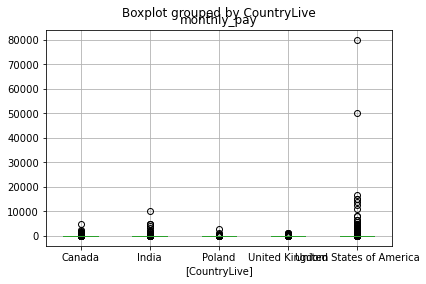

In [378]:
potential_markets[['CountryLive', 'monthly_pay']].boxplot(by = 'CountryLive')

In [395]:
#remove outliers
pm_no_outliers = potential_markets[potential_markets['monthly_pay'] < 5000]

In [396]:
avg_monthly = pm_no_outliers[['CountryLive', 'monthly_pay']].dropna().groupby(by = ['CountryLive']).mean()

In [397]:
avg_monthly

,monthly_pay
CountryLive,
Canada,105.057931
India,83.904458
Poland,78.796755
United Kingdom,49.117435
United States of America,143.590930


# Conclusion

Based on these results, I would recommend that my employer market the new e-learing platform in the United States and Canada with the rationale that these countries have the greatest potential source of monthly revenue.